# Classifier-5 Data Analysis

## Imports

In [8]:
# for dataframes
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

# for resampling
from sklearn.utils import resample

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score

from imblearn.over_sampling import SMOTE

## Loading data

In [2]:
data = pd.read_csv("../data/classifier-5.csv")

In [3]:
data.head(10)

,x1,x2,x3,x4,x5,y
0,1.333478,-3.144541,0.397304,-1.461444,2.180061,0
1,-1.091977,1.176080,-1.587778,1.539021,-0.224769,0
2,1.669082,-1.987684,0.906557,-1.820797,1.140290,0
3,-1.153876,0.409411,-0.805778,1.246085,-0.011993,0
4,-0.841134,1.145156,-0.512235,0.948967,-0.654546,0
5,-0.608754,-0.358632,0.261479,0.364575,0.112202,0
6,-0.023972,-0.111678,0.672327,-0.231527,-0.211924,0
7,0.269279,-0.143414,0.806664,-0.517099,-0.230709,0
8,-1.816903,0.228182,-3.169862,2.612519,1.106886,0
9,0.229233,-1.718759,0.700435,-0.572693,0.954030,1


In [4]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
x1,10000.0,0.052229,1.242222,-3.100948,-0.987295,-0.143109,1.065109,4.483801
x2,10000.0,-0.024435,1.530305,-4.857972,-1.164879,-0.133003,1.050957,5.414320
x3,10000.0,-0.007914,1.206795,-4.241509,-1.012448,0.180799,1.000891,3.147817
x4,10000.0,-0.040911,1.423594,-4.544448,-1.250226,0.071635,1.213653,3.561636
x5,10000.0,0.024061,1.051362,-3.944662,-0.653133,0.051322,0.740456,3.897858
y,10000.0,0.054500,0.227013,0.000000,0.000000,0.000000,0.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
x1    10000 non-null float64
x2    10000 non-null float64
x3    10000 non-null float64
x4    10000 non-null float64
x5    10000 non-null float64
y     10000 non-null int64
dtypes: float64(5), int64(1)
memory usage: 468.8 KB


## Exploratory Data Analysis

In [6]:
x1 = data['x1']
x2 = data['x2']
x3 = data['x3']
x4 = data['x4']
y = data['y']

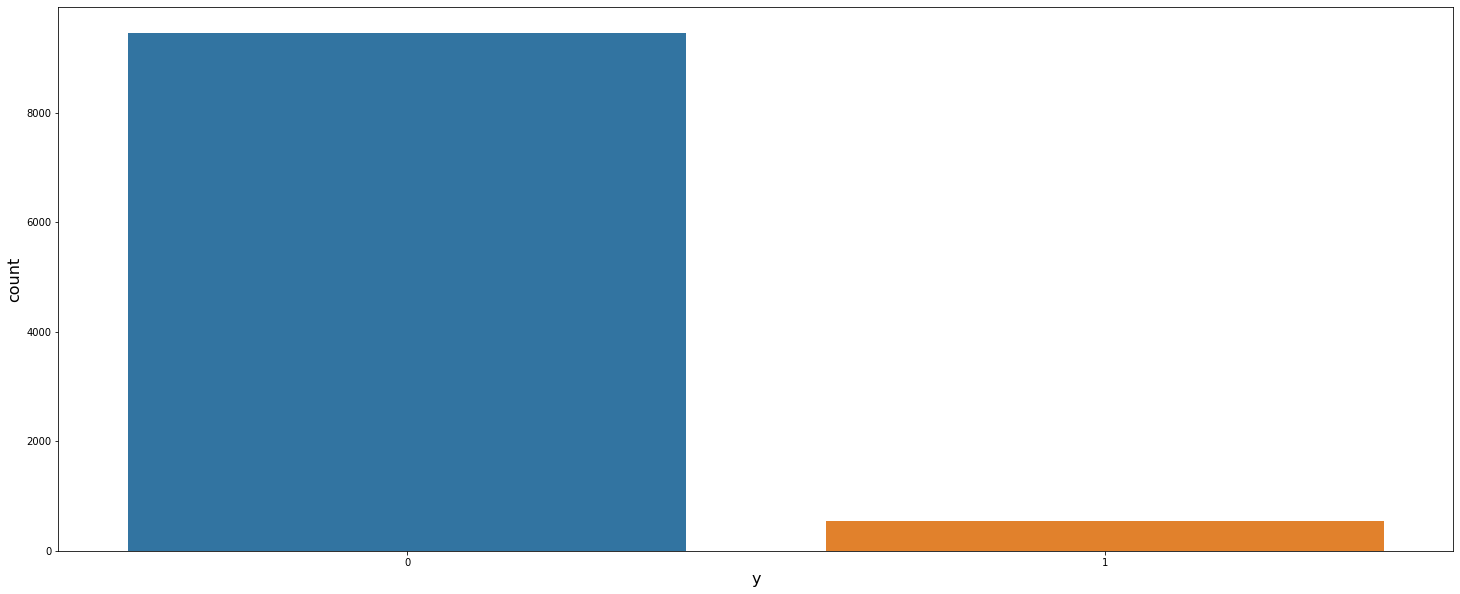

In [9]:
sns.countplot(y);

We can see that there is an extreme class imbalance here. We will need to fix this to make class 1 more equally represented. We cannot use this data to train our models because our results will be biased due to this giant disparity.

### Up-sampling

In [10]:
df_minority = data[data['y'] == 1]
df_majority = data[data['y'] == 0]

In [11]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

In [12]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [13]:
X = df_upsampled.iloc[:, :4]
y = df_upsampled['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# testing our data
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
print(clf1.score(X_test, y_test))
y_pred = clf1.predict(X_test)

0.7478849407783418


/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
confusion_matrix(y_test, y_pred)

array([[1779,  596],
       [ 596, 1757]])

In [16]:
recall_score(y_test, y_pred)

0.7467063323416915

In [17]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train, y_train)
print((clf2.score(X_test, y_test)))
y_pred = clf2.predict(X_test)

0.9818104906937394


In [18]:
confusion_matrix(y_test, y_pred)

array([[2289,   86],
       [   0, 2353]])

In [19]:
recall_score(y_test, y_pred)

1.0

In [20]:
clf3 = RandomForestClassifier()
clf3.fit(X_train, y_train)
print(clf3.score(X_test, y_test))
y_pred = clf3.predict(X_test)

0.9970389170896785


/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
confusion_matrix(y_test, y_pred)

array([[2361,   14],
       [   0, 2353]])

In [22]:
recall_score(y_test, y_pred)

1.0

We see that both the Random Forest and KNeighbors classifiers produce very good accuracies and have great recall scores. Since Random Forest only produces a 1% increase in accuracy, moving forward, let's use the KNeighbors since it is more interpretable, and requires less computational power.

### Down-sampling

In [23]:
df_minority = data[data['y'] == 1]
df_majority = data[data['y'] == 0]

In [24]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=len(df_minority),    # to match majority class
                                 random_state=123) # reproducible results

In [25]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [26]:
X = df_downsampled.iloc[:, :4]
y = df_downsampled['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
print(clf1.score(X_test, y_test))
y_pred = clf1.predict(X_test)

0.9084249084249084


In [28]:
confusion_matrix(y_test, y_pred)

array([[127,   5],
       [ 20, 121]])

In [29]:
recall_score(y_test, y_pred)

0.8581560283687943

In [30]:
# testing our data
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))
y_pred = clf2.predict(X_test)

0.8937728937728938


/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
confusion_matrix(y_test, y_pred)

array([[122,  10],
       [ 19, 122]])

In [32]:
recall_score(y_test, y_pred)

0.8652482269503546

### SMOTE

In [33]:
X = data.iloc[:, :4]
y = data['y']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

In [36]:
X_train = pd.DataFrame(data=X_train, 
                     columns=['x1', 'x2', 'x3', 'x4'])

In [37]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
print(clf1.score(X_test, y_test))
y_pred = clf1.predict(X_test)

0.732


/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
confusion_matrix(y_test, y_pred)

array([[1740,  620],
       [  50,   90]])

In [39]:
recall_score(y_test, y_pred)

0.6428571428571429

In [40]:
clf2 = KNeighborsClassifier()
clf2.fit(X_train, y_train)
print(clf2.score(X_test, y_test))
y_pred = clf2.predict(X_test)

0.9456


In [41]:
confusion_matrix(y_test, y_pred)

array([[2246,  114],
       [  22,  118]])

In [42]:
recall_score(y_test, y_pred)

0.8428571428571429

In [43]:
clf3 = RandomForestClassifier()
clf3.fit(X_train, y_train)
print(clf3.score(X_test, y_test))
y_pred = clf3.predict(X_test)

0.9696


/Users/stiwari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
confusion_matrix(y_test, y_pred)

array([[2309,   51],
       [  25,  115]])

In [45]:
recall_score(y_test, y_pred)

0.8214285714285714

We see from our results, that upsampling the minority class, and then using the KNeighbors classifier produces the best results